## Contest from datasource.ai - Financial inclusion

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [79]:
df_train=pd.read_csv(r'C:\Users\feche\Documents\Curso Python\datasets\Inclusion Financiera\Train.csv')
df_test=pd.read_csv(r'C:\Users\feche\Documents\Curso Python\datasets\Inclusion Financiera\Test.csv')

In [80]:
df_train.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Argentina,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Argentina,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Argentina,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Argentina,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Argentina,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [81]:
df_train.shape

(23524, 13)

In [82]:
columns=df_train.columns.values.tolist()

In [83]:
#Checking for NaN and null
for i in columns:
    null_values=pd.isnull(df_train[i]).values.ravel().sum()
    nan=pd.isna(df_train[i]).values.ravel().sum()
    print(null_values,nan)

0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0


In [84]:
#Checking for NaN and null
columns=df_test.columns.values.tolist()
for i in columns:
    null_values=pd.isnull(df_test[i]).values.ravel().sum()
    nan=pd.isna(df_test[i]).values.ravel().sum()
    print(null_values,nan)

0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0


According to the prevoious check, there is no missing information

In [85]:
#Check that all variables have the correct type
df_train.dtypes

country                   object
year                       int64
uniqueid                  object
bank_account              object
location_type             object
cellphone_access          object
household_size             int64
age_of_respondent          int64
gender_of_respondent      object
relationship_with_head    object
marital_status            object
education_level           object
job_type                  object
dtype: object

In [86]:
df_train['relationship_with_head'].unique()

array(['Spouse', 'Head of Household', 'Other relative', 'Child', 'Parent',
       'Other non-relatives'], dtype=object)

In [87]:
df_train['marital_status'].unique()

array(['Married/Living together', 'Widowed', 'Single/Never Married',
       'Divorced/Seperated', 'Dont know'], dtype=object)

In [88]:
df_train['education_level'].unique()

array(['Secondary education', 'No formal education',
       'Vocational/Specialised training', 'Primary education',
       'Tertiary education', 'Other/Dont know/RTA'], dtype=object)

In [89]:
df_train['job_type'].unique()

array(['Self employed', 'Government Dependent',
       'Formally employed Private', 'Informally employed',
       'Formally employed Government', 'Farming and Fishing',
       'Remittance Dependent', 'Other Income',
       'Dont Know/Refuse to answer', 'No Income'], dtype=object)

In [90]:
pd.crosstab(df_train.job_type,df_train.bank_account)

bank_account,No,Yes
job_type,,
Dont Know/Refuse to answer,112,14
Farming and Fishing,4806,635
Formally employed Government,87,300
Formally employed Private,484,571
Government Dependent,197,50
Informally employed,5152,445
No Income,614,13
Other Income,884,196
Remittance Dependent,2287,240


In [91]:
jobs=df_train['job_type'].unique()
for job in jobs:
    df_temp=df_train[df_train.job_type==job]
    bank_account_yes=sum(df_temp['bank_account']=="Yes")
    bank_account_no=sum(df_temp['bank_account']=="No")
    portion_with_ba=round(bank_account_yes/(bank_account_yes+bank_account_no),2)*100
    print(job,", Have bank account:",bank_account_yes,",Don't have bank account:",bank_account_no,",% with bank account:",portion_with_ba,"%")

Self employed , Have bank account: 848 ,Don't have bank account: 5589 ,% with bank account: 13.0 %
Government Dependent , Have bank account: 50 ,Don't have bank account: 197 ,% with bank account: 20.0 %
Formally employed Private , Have bank account: 571 ,Don't have bank account: 484 ,% with bank account: 54.0 %
Informally employed , Have bank account: 445 ,Don't have bank account: 5152 ,% with bank account: 8.0 %
Formally employed Government , Have bank account: 300 ,Don't have bank account: 87 ,% with bank account: 78.0 %
Farming and Fishing , Have bank account: 635 ,Don't have bank account: 4806 ,% with bank account: 12.0 %
Remittance Dependent , Have bank account: 240 ,Don't have bank account: 2287 ,% with bank account: 9.0 %
Other Income , Have bank account: 196 ,Don't have bank account: 884 ,% with bank account: 18.0 %
Dont Know/Refuse to answer , Have bank account: 14 ,Don't have bank account: 112 ,% with bank account: 11.0 %
No Income , Have bank account: 13 ,Don't have bank acc

Text(0, 0.5, 'Access to bank account')

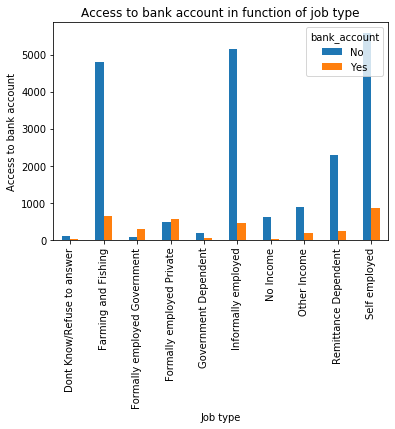

In [92]:
%matplotlib inline
pd.crosstab(df_train.job_type,df_train.bank_account).plot(kind="bar")
plt.title("Access to bank account in function of job type")
plt.xlabel("Job type")
plt.ylabel("Access to bank account")

#### Job Type seems to be a key factor

In [93]:
pd.crosstab(df_train.cellphone_access,df_train.bank_account)

bank_account,No,Yes
cellphone_access,,
No,5966,104
Yes,14246,3208


Text(0, 0.5, 'Access to bank account')

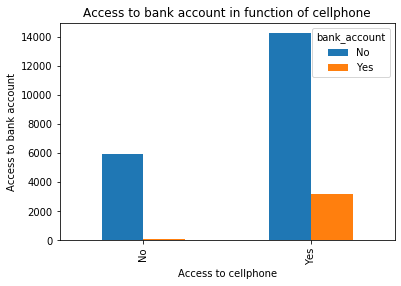

In [94]:
%matplotlib inline
pd.crosstab(df_train.cellphone_access,df_train.bank_account).plot(kind="bar")
plt.title("Access to bank account in function of cellphone")
plt.xlabel("Access to cellphone")
plt.ylabel("Access to bank account")

#### Access to cellphone seems to be relevant

In [95]:
pd.crosstab(df_train.location_type,df_train.bank_account)

bank_account,No,Yes
location_type,,
Rural,12672,1671
Urban,7540,1641


Text(0, 0.5, 'Access to bank account')

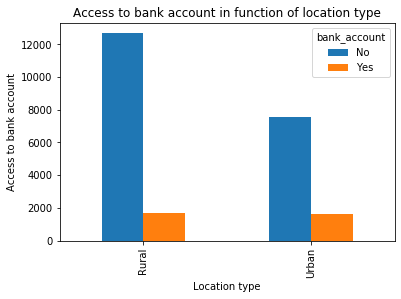

In [96]:
%matplotlib inline
pd.crosstab(df_train.location_type,df_train.bank_account).plot(kind="bar")
plt.title("Access to bank account in function of location type")
plt.xlabel("Location type")
plt.ylabel("Access to bank account")

#### Location type also seems to have some impact

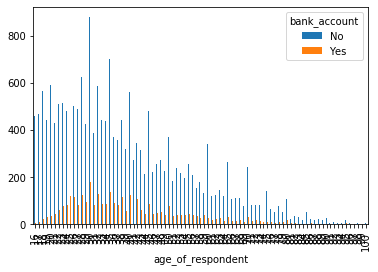

In [97]:
pd.crosstab(df_train.age_of_respondent,df_train.bank_account).plot(kind="bar")

Text(0.5, 1.0, 'Age histogram')

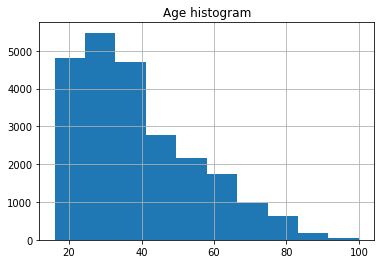

In [98]:
%matplotlib inline
df_train.age_of_respondent.hist()
plt.title("Age histogram")

#### Age seems to have a normal distribution, left oriented

### Categorical variables to dummies

In [99]:
categories=["country","relationship_with_head","marital_status","education_level","job_type","year"]

for category in categories:
    cat_dummies=pd.get_dummies(df_train[category], prefix=category)
    df_train_new=df_train.join(cat_dummies)
    df_train=df_train_new
    
for category in categories:
    cat_dummies=pd.get_dummies(df_test[category], prefix=category)
    df_test_new=df_test.join(cat_dummies)
    df_test=df_test_new

### Two stages variables to 0-1

In [100]:
df_train["bank_account"]=(df_train["bank_account"]=="Yes").astype(int) # 1 has bank account, 0 doesn't have
df_train["location_type"]=(df_train["location_type"]=="Urban").astype(int) # 1=Urban, 0=Rural
df_train["cellphone_access"]=(df_train["cellphone_access"]=="Yes").astype(int) # 1=Has cellphone, 0=doesn't have cellphone
df_train["gender_of_respondent"]=(df_train["gender_of_respondent"]=="Male").astype(int) #1=Male, 0=Female

df_test["location_type"]=(df_test["location_type"]=="Urban").astype(int) # 1=Urban, 0=Rural
df_test["cellphone_access"]=(df_test["cellphone_access"]=="Yes").astype(int) # 1=Has cellphone, 0=doesn't have cellphone
df_test["gender_of_respondent"]=(df_test["gender_of_respondent"]=="Male").astype(int) #1=Male, 0=Female

In [101]:
df_train.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,...,job_type_Formally employed Private,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed,year_2016,year_2017,year_2018
0,Argentina,2018,uniqueid_1,1,0,1,3,24,0,Spouse,...,0,0,0,0,0,0,1,0,0,1
1,Argentina,2018,uniqueid_2,0,0,0,5,70,0,Head of Household,...,0,1,0,0,0,0,0,0,0,1
2,Argentina,2018,uniqueid_3,1,1,1,5,26,1,Other relative,...,0,0,0,0,0,0,1,0,0,1
3,Argentina,2018,uniqueid_4,0,0,1,5,34,0,Head of Household,...,1,0,0,0,0,0,0,0,0,1
4,Argentina,2018,uniqueid_5,0,1,0,8,26,1,Child,...,0,0,1,0,0,0,0,0,0,1


### Normalizacion de datos

In [102]:
df_train["household_size"]=(df_train["household_size"]-df_train["household_size"].min())/(df_train["household_size"].max()-df_train["household_size"].min())
df_train["age_of_respondent"]=(df_train["age_of_respondent"]-df_train["age_of_respondent"].min())/(df_train["age_of_respondent"].max()-df_train["age_of_respondent"].min())

df_test["household_size"]=(df_test["household_size"]-df_test["household_size"].min())/(df_test["household_size"].max()-df_test["household_size"].min())
df_test["age_of_respondent"]=(df_test["age_of_respondent"]-df_test["age_of_respondent"].min())/(df_test["age_of_respondent"].max()-df_test["age_of_respondent"].min())

### Model implementation - Logistic Regression

In [103]:
from sklearn import linear_model

In [104]:
df_train.columns.values

array(['country', 'year', 'uniqueid', 'bank_account', 'location_type',
       'cellphone_access', 'household_size', 'age_of_respondent',
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'education_level', 'job_type', 'country_Argentina',
       'country_Chile', 'country_Colombia', 'country_Mexico',
       'relationship_with_head_Child',
       'relationship_with_head_Head of Household',
       'relationship_with_head_Other non-relatives',
       'relationship_with_head_Other relative',
       'relationship_with_head_Parent', 'relationship_with_head_Spouse',
       'marital_status_Divorced/Seperated', 'marital_status_Dont know',
       'marital_status_Married/Living together',
       'marital_status_Single/Never Married', 'marital_status_Widowed',
       'education_level_No formal education',
       'education_level_Other/Dont know/RTA',
       'education_level_Primary education',
       'education_level_Secondary education',
       'education_level_Tert

In [106]:
predicting_cols=['location_type', 'cellphone_access',
       'household_size', 'age_of_respondent', 'gender_of_respondent',
       'country_Argentina', 'country_Chile', 'country_Colombia',
       'country_Mexico', 'relationship_with_head_Child',
       'relationship_with_head_Head of Household',
       'relationship_with_head_Other non-relatives',
       'relationship_with_head_Other relative',
       'relationship_with_head_Parent', 'relationship_with_head_Spouse',
       'marital_status_Divorced/Seperated', 'marital_status_Dont know',
       'marital_status_Married/Living together',
       'marital_status_Single/Never Married', 'marital_status_Widowed',
       'education_level_No formal education',
       'education_level_Other/Dont know/RTA',
       'education_level_Primary education',
       'education_level_Secondary education',
       'education_level_Tertiary education',
       'education_level_Vocational/Specialised training',
       'job_type_Dont Know/Refuse to answer',
       'job_type_Farming and Fishing',
       'job_type_Formally employed Government',
       'job_type_Formally employed Private',
       'job_type_Government Dependent', 'job_type_Informally employed',
       'job_type_No Income', 'job_type_Other Income',
       'job_type_Remittance Dependent', 'job_type_Self employed',
       'year_2016', 'year_2017', 'year_2018']

X=df_train[predicting_cols]
Y=df_train['bank_account']

In [107]:
logit_model=linear_model.LogisticRegression(max_iter=200,random_state=11)
logit_model.fit(X,Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=11, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [108]:
logit_model.score(X,Y)

0.8853936405373236

### Model Validation

In [109]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [110]:
X_train, X_test, Y_train, Y_test=train_test_split(X,Y, test_size=0.3)

In [111]:
lm=linear_model.LogisticRegression(max_iter=200, random_state=11)
lm.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=11, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [112]:
prediction=lm.predict(X_test)

In [113]:
metrics.accuracy_score(Y_test, prediction)

0.8852366109379428

In [114]:
probs=logit_model.predict_proba(X_test)
prob=probs[:,1]
espc_1, sensit, _ =metrics.roc_curve(Y_test,prob)

Text(0.5, 1.0, 'Curva ROC, AUC=0.8413')

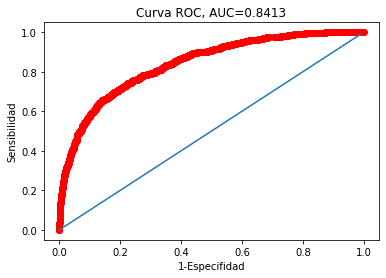

In [115]:
auc=round(metrics.auc(espc_1,sensit),4)
%matplotlib inline
plt.plot(espc_1,sensit, marker="o", linestyle="--", color="red" )
x=[i*0.01 for i in range(100)]
y=[i*0.01 for i in range(100)]
plt.plot(x,y)
plt.xlabel("1-Especifidad")
plt.ylabel("Sensibilidad")
plt.title("Curva ROC, AUC=%s"%auc)

### Predictions

In [117]:
predicting_cols=['location_type', 'cellphone_access',
       'household_size', 'age_of_respondent', 'gender_of_respondent',
       'country_Argentina', 'country_Chile', 'country_Colombia',
       'country_Mexico', 'relationship_with_head_Child',
       'relationship_with_head_Head of Household',
       'relationship_with_head_Other non-relatives',
       'relationship_with_head_Other relative',
       'relationship_with_head_Parent', 'relationship_with_head_Spouse',
       'marital_status_Divorced/Seperated', 'marital_status_Dont know',
       'marital_status_Married/Living together',
       'marital_status_Single/Never Married', 'marital_status_Widowed',
       'education_level_No formal education',
       'education_level_Other/Dont know/RTA',
       'education_level_Primary education',
       'education_level_Secondary education',
       'education_level_Tertiary education',
       'education_level_Vocational/Specialised training',
       'job_type_Dont Know/Refuse to answer',
       'job_type_Farming and Fishing',
       'job_type_Formally employed Government',
       'job_type_Formally employed Private',
       'job_type_Government Dependent', 'job_type_Informally employed',
       'job_type_No Income', 'job_type_Other Income',
       'job_type_Remittance Dependent', 'job_type_Self employed',
       'year_2016', 'year_2017', 'year_2018']

X_test=df_test[predicting_cols]

In [118]:
prediction=logit_model.predict(X_test)

In [119]:
df_test_prediction=df_test[["country","uniqueid"]]

In [120]:
df_test_prediction["bank_account"]=logit_model.predict(X_test)

C:\Users\feche\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [121]:
df_test_prediction.head()

,country,uniqueid,bank_account
0,Argentina,uniqueid_6056,1
1,Argentina,uniqueid_6060,1
2,Argentina,uniqueid_6065,0
3,Argentina,uniqueid_6072,0
4,Argentina,uniqueid_6073,0


In [122]:
df_test_prediction["bank_account"].value_counts()

0    9366
1     720
Name: bank_account, dtype: int64

In [123]:
720/(9366+720)

0.07138607971445568

In [124]:
df_train["bank_account"].value_counts()

0    20212
1     3312
Name: bank_account, dtype: int64

In [125]:
3312/(20212+3312)

0.14079238224791701

In [50]:
df_test_prediction["concat"]=df_test_prediction["uniqueid"]+" x "+df_test_prediction["country"]

C:\Users\feche\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [51]:
df_test_prediction["bank_account2"]=df_test_prediction["bank_account"]
df_test_prediction=df_test_prediction.drop(columns=["country","uniqueid","bank_account"])

C:\Users\feche\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [52]:
df_test_prediction.to_csv(r'C:\Users\feche\Documents\Curso Python\datasets\Inclusion Financiera\Prediction_Logistic_Regression.csv',index=None)

### Model implementation - Desicion Tree

In [126]:
from sklearn.tree import DecisionTreeClassifier

In [127]:
tree=DecisionTreeClassifier(criterion="entropy", min_samples_split=5, random_state=12)
tree.fit(X,Y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=12, splitter='best')

In [128]:
tree.score(X,Y)

0.9520914810406393

In [129]:
df_test_prediction=df_test[["country","uniqueid"]]
df_test_prediction["bank_account"]=tree.predict(X_test)
df_test_prediction["concat"]=df_test_prediction["uniqueid"]+" x "+df_test_prediction["country"]
df_test_prediction["bank_account2"]=df_test_prediction["bank_account"]
df_test_prediction=df_test_prediction.drop(columns=["country","uniqueid","bank_account"])
df_test_prediction.head()

C:\Users\feche\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\feche\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\feche\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

,concat,bank_account2
0,uniqueid_6056 x Argentina,1
1,uniqueid_6060 x Argentina,1
2,uniqueid_6065 x Argentina,0
3,uniqueid_6072 x Argentina,0
4,uniqueid_6073 x Argentina,0


In [57]:
df_test_prediction.to_csv(r'C:\Users\feche\Documents\Curso Python\datasets\Inclusion Financiera\Prediction_Decision_Tree.csv',index=None)

In [130]:
df_test_prediction["bank_account2"].value_counts()

0    8925
1    1161
Name: bank_account2, dtype: int64

In [132]:
1161/(8925+1161)

0.11511005353955979

### Model Implementation - Random Forest

In [139]:
from sklearn.ensemble import RandomForestClassifier

In [140]:
forest=RandomForestClassifier(n_jobs=2, oob_score=True, n_estimators=100,random_state=12)
forest.fit(X,Y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=2,
                       oob_score=True, random_state=12, verbose=0,
                       warm_start=False)

In [141]:
forest.score(X,Y)

0.9780224451623873

In [142]:
forest.oob_score_

0.8652014963441591

### K-Fold Validation

In [143]:
from sklearn.model_selection import cross_val_score

In [148]:
rf = RandomForestClassifier(n_estimators=100,random_state=12)
scores = cross_val_score(rf, X, Y, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.79515512 0.80322992 0.85677858 0.86230344 0.87244898 0.8579932
 0.85629252 0.87329932 0.89668367 0.87372449]
Mean: 0.8547909240194166
Standard Deviation: 0.030092713826140698


In [149]:
importances = pd.DataFrame({'feature':X.columns,'importance':np.round(forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(20)

,importance
feature,
age_of_respondent,0.346
household_size,0.144
job_type_Formally employed Private,0.044
education_level_Tertiary education,0.042
location_type,0.038
job_type_Formally employed Government,0.034
education_level_Vocational/Specialised training,0.030
cellphone_access,0.029
education_level_Primary education,0.024


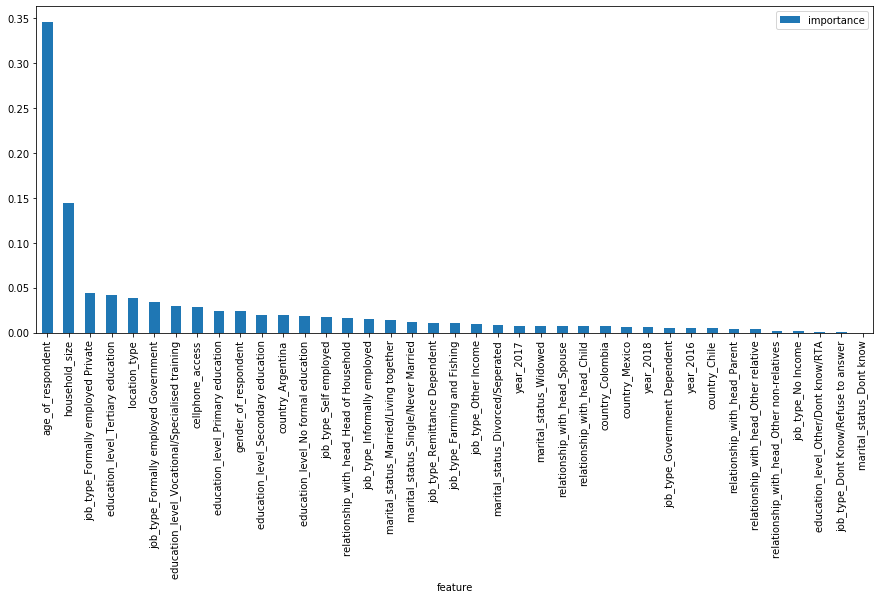

In [150]:
importances.plot.bar(figsize=(15,6))

### Test Modifying Data 

In [151]:
df_train=pd.read_csv(r'C:\Users\feche\Documents\Curso Python\datasets\Inclusion Financiera\Train.csv')
df_test=pd.read_csv(r'C:\Users\feche\Documents\Curso Python\datasets\Inclusion Financiera\Test.csv')

In [152]:
# Condensing Job_type
df_train['job_type']=np.where((df_train['job_type']=='Formally employed Private')|(df_train['job_type']=='Formally employed Government'),'Formally Employed',df_train['job_type'])
df_train['job_type']=np.where((df_train['job_type']=='Self employed')|(df_train['job_type']=='Government Dependent')|(df_train['job_type']=='Informally employed')|(df_train['job_type']=='Remittance Dependent')|(df_train['job_type']=='Other Income')|(df_train['job_type']=='Dont Know/Refuse to answer')|(df_train['job_type']=='No Income'),'Informally Employed',df_train['job_type'])

df_test['job_type']=np.where((df_test['job_type']=='Formally employed Private')|(df_test['job_type']=='Formally employed Government'),'Formally Employed',df_test['job_type'])
df_test['job_type']=np.where((df_test['job_type']=='Self employed')|(df_test['job_type']=='Government Dependent')|(df_test['job_type']=='Informally employed')|(df_test['job_type']=='Remittance Dependent')|(df_test['job_type']=='Other Income')|(df_test['job_type']=='Dont Know/Refuse to answer')|(df_test['job_type']=='No Income'),'Informally Employed',df_test['job_type'])

In [153]:
# Condensing relationship with head of household
df_train['relationship_with_head']=np.where((df_train['relationship_with_head']=='Other relative')|(df_train['relationship_with_head']=='Child')|(df_train['relationship_with_head']=='Parent'),'Relative',df_train['relationship_with_head'])

df_test['relationship_with_head']=np.where((df_test['relationship_with_head']=='Other relative')|(df_test['relationship_with_head']=='Child')|(df_test['relationship_with_head']=='Parent'),'Relative',df_test['relationship_with_head'])

In [154]:
#Create Dummies
categories=["country","relationship_with_head","marital_status","education_level","job_type","year"]

for category in categories:
    cat_dummies=pd.get_dummies(df_train[category], prefix=category)
    df_train_new=df_train.join(cat_dummies)
    df_train=df_train_new
    
for category in categories:
    cat_dummies=pd.get_dummies(df_test[category], prefix=category)
    df_test_new=df_test.join(cat_dummies)
    df_test=df_test_new

In [155]:
#Two categories variables to binary
df_train["bank_account"]=(df_train["bank_account"]=="Yes").astype(int) # 1 has bank account, 0 doesn't have
df_train["location_type"]=(df_train["location_type"]=="Urban").astype(int) # 1=Urban, 0=Rural
df_train["cellphone_access"]=(df_train["cellphone_access"]=="Yes").astype(int) # 1=Has cellphone, 0=doesn't have cellphone
df_train["gender_of_respondent"]=(df_train["gender_of_respondent"]=="Male").astype(int) #1=Male, 0=Female

df_test["location_type"]=(df_test["location_type"]=="Urban").astype(int) # 1=Urban, 0=Rural
df_test["cellphone_access"]=(df_test["cellphone_access"]=="Yes").astype(int) # 1=Has cellphone, 0=doesn't have cellphone
df_test["gender_of_respondent"]=(df_test["gender_of_respondent"]=="Male").astype(int) #1=Male, 0=Female

In [156]:
#Selecting predictor variables (Dropping Year and country)
predicting_cols=['location_type',
 'cellphone_access',
 'household_size',
 'age_of_respondent',
 'gender_of_respondent',
 'relationship_with_head_Head of Household',
 'relationship_with_head_Other non-relatives',
 'relationship_with_head_Relative',
 'relationship_with_head_Spouse',
 'marital_status_Divorced/Seperated',
 'marital_status_Dont know',
 'marital_status_Married/Living together',
 'marital_status_Single/Never Married',
 'marital_status_Widowed',
 'education_level_No formal education',
 'education_level_Other/Dont know/RTA',
 'education_level_Primary education',
 'education_level_Secondary education',
 'education_level_Tertiary education',
 'education_level_Vocational/Specialised training',
 'job_type_Farming and Fishing',
 'job_type_Formally Employed',
 'job_type_Informally Employed']

X=df_train[predicting_cols]
X_test=df_test[predicting_cols]
Y=df_train['bank_account']

In [164]:
#Testing Forest again
forest=RandomForestClassifier(n_jobs=2, oob_score=True, n_estimators=100,random_state=11)
forest.fit(X,Y)
print("Forest Score:",forest.score(X,Y))
print("Forest oob Score:",forest.oob_score_)

Forest Score: 0.9568525760925013
Forest oob Score: 0.8576772657711274


In [165]:
#K-fold Validation
rf = RandomForestClassifier(n_estimators=100,random_state=12)
scores = cross_val_score(rf, X, Y, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.81470463 0.82320442 0.8559286  0.87165321 0.86011905 0.85161565
 0.85544218 0.86819728 0.87882653 0.8537415 ]
Mean: 0.8533433039599181
Standard Deviation: 0.019148708546777266


In [81]:
#Check for best parameters
from sklearn.model_selection import GridSearchCV, cross_val_score
param_grid = { "criterion" : ["gini", "entropy"], "min_samples_leaf" : [1,15,20], "min_samples_split" : [2,5,10], "n_estimators": [50,100]}
rf = RandomForestClassifier(n_estimators=100, max_features='auto', oob_score=True)
clf = GridSearchCV(estimator=rf, param_grid=param_grid)
clf.fit(X, Y)
clf.best_params_

C:\Users\feche\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\feche\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


{'criterion': 'entropy',
 'min_samples_leaf': 15,
 'min_samples_split': 5,
 'n_estimators': 50}

In [166]:
#Testing Forest again
forest=RandomForestClassifier(n_jobs=2, oob_score=True, n_estimators=50, criterion="entropy", min_samples_leaf=5,min_samples_split=5,random_state=12)
forest.fit(X,Y)
print("Forest Score:",forest.score(X,Y))
print("Forest oob Score:",forest.oob_score_)

Forest Score: 0.8955109675225302
Forest oob Score: 0.8852661112055773


In [167]:
#Cross Validation
scores = cross_val_score(forest, X, Y, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.86102847 0.8720782  0.8878028  0.89290268 0.89413265 0.87585034
 0.86904762 0.88435374 0.90136054 0.88520408]
Mean: 0.8823761134287971
Standard Deviation: 0.011969937432982641


In [168]:
df_test_prediction=df_test[["country","uniqueid"]]
df_test_prediction["bank_account"]=forest.predict(X_test)
df_test_prediction["concat"]=df_test_prediction["uniqueid"]+" x "+df_test_prediction["country"]
df_test_prediction["bank_account2"]=df_test_prediction["bank_account"]
df_test_prediction=df_test_prediction.drop(columns=["country","uniqueid","bank_account"])
df_test_prediction.head()

C:\Users\feche\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\feche\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\feche\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

,concat,bank_account2
0,uniqueid_6056 x Argentina,1
1,uniqueid_6060 x Argentina,1
2,uniqueid_6065 x Argentina,0
3,uniqueid_6072 x Argentina,0
4,uniqueid_6073 x Argentina,0


In [98]:
df_test_prediction.to_csv(r'C:\Users\feche\Documents\Curso Python\datasets\Inclusion Financiera\Prediction_Random_Forest.csv',index=None)

In [169]:
df_test_prediction["bank_account2"].value_counts()

0    9478
1     608
Name: bank_account2, dtype: int64

### Gradient Boost Model

In [170]:
from sklearn.ensemble import GradientBoostingClassifier

In [176]:
gb=GradientBoostingClassifier(learning_rate=0.05,min_samples_leaf=15,min_samples_split=2,n_estimators=500,random_state=12)
gb.fit(X,Y)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.05, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=15, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=500,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=12, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [177]:
gb.score(X,Y)

0.88896446182622

In [173]:
#Cross Validation
scores = cross_val_score(gb, X, Y, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.8559286  0.86655334 0.88822779 0.89375266 0.89073129 0.87287415
 0.86564626 0.87627551 0.90348639 0.89073129]
Mean: 0.8804207286399471
Standard Deviation: 0.0143802589524007


In [88]:
#Check for best parameters
from sklearn.model_selection import GridSearchCV, cross_val_score
param_grid = { "criterion" : ["friedman_mse", "mse"],"learning_rate" :[0.05,0.1,0.3,0.5], "min_samples_leaf" : [1,15,30], "min_samples_split" : [2,10,30], "n_estimators": [50,200]}
gb = GradientBoostingClassifier(n_estimators=100, max_features='auto')
clf = GridSearchCV(estimator=gb, param_grid=param_grid)
clf.fit(X, Y)
clf.best_params_

{'criterion': 'friedman_mse',
 'learning_rate': 0.05,
 'min_samples_leaf': 30,
 'min_samples_split': 2,
 'n_estimators': 50}

Best params
{'criterion': 'friedman_mse',
 'learning_rate': 0.05,
 'min_samples_leaf': 30,
 'min_samples_split': 2,
 'n_estimators': 50}

In [92]:
#Check for best parameters, different ranges
from sklearn.model_selection import GridSearchCV, cross_val_score
param_grid = { "criterion" : ["friedman_mse", "mse"],"learning_rate" :[0.01,0.05], "min_samples_leaf" : [15,30,45], "min_samples_split" : [2], "n_estimators": [30, 50]}
gb = GradientBoostingClassifier(n_estimators=100, max_features='auto')
clf = GridSearchCV(estimator=gb, param_grid=param_grid)
clf.fit(X, Y)
clf.best_params_

{'criterion': 'friedman_mse',
 'learning_rate': 0.05,
 'min_samples_leaf': 15,
 'min_samples_split': 2,
 'n_estimators': 30}

In [174]:
df_test_prediction=df_test[["country","uniqueid"]]
df_test_prediction["bank_account"]=gb.predict(X_test)
df_test_prediction["concat"]=df_test_prediction["uniqueid"]+" x "+df_test_prediction["country"]
df_test_prediction["bank_account2"]=df_test_prediction["bank_account"]
df_test_prediction=df_test_prediction.drop(columns=["country","uniqueid","bank_account"])
df_test_prediction.head()

C:\Users\feche\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\feche\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\feche\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

,concat,bank_account2
0,uniqueid_6056 x Argentina,1
1,uniqueid_6060 x Argentina,1
2,uniqueid_6065 x Argentina,0
3,uniqueid_6072 x Argentina,0
4,uniqueid_6073 x Argentina,0


In [175]:
df_test_prediction["bank_account2"].value_counts()

0    9401
1     685
Name: bank_account2, dtype: int64

In [105]:
df_test_prediction.to_csv(r'C:\Users\feche\Documents\Curso Python\datasets\Inclusion Financiera\Prediction_Gradient_Boosting.csv',index=None)